In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/SBAnational.csv')

<ipython-input-2-02398b286619>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/SBAnational.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
df.shape

(899164, 27)

In [ ]:
df.isna().sum()

,0
LoanNr_ChkDgt,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [ ]:
df.nunique()

,0
LoanNr_ChkDgt,899164
Name,779583
City,32581
State,51
Zip,33611
Bank,5802
BankState,56
NAICS,1312
ApprovalDate,9859
ApprovalFY,70


In [ ]:
df.drop(['Name','City','State','BankState','Bank','Zip','ApprovalDate','ApprovalFY','ChgOffDate','DisbursementDate','ChgOffPrinGr','FranchiseCode'],axis=1,inplace=True)

In [ ]:
df.shape

(899164, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   NAICS              899164 non-null  int64  
 2   Term               899164 non-null  int64  
 3   NoEmp              899164 non-null  int64  
 4   NewExist           899028 non-null  float64
 5   CreateJob          899164 non-null  int64  
 6   RetainedJob        899164 non-null  int64  
 7   UrbanRural         899164 non-null  int64  
 8   RevLineCr          894636 non-null  object 
 9   LowDoc             896582 non-null  object 
 10  DisbursementGross  899164 non-null  object 
 11  BalanceGross       899164 non-null  object 
 12  MIS_Status         897167 non-null  object 
 13  GrAppv             899164 non-null  object 
 14  SBA_Appv           899164 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 10

In [ ]:
# Fill missing values in 'NewExist' with the most frequent value (mode)
df['NewExist'].fillna(df['NewExist'].mode()[0], inplace=True)

In [ ]:
# Fill missing values in 'RevLineCr' and 'LowDoc' with a placeholder 'No'
df['RevLineCr'].fillna('No', inplace=True)
df['LowDoc'].fillna('No', inplace=True)

In [ ]:
# Drop rows with missing 'MIS_Status' as it might be critical for classification
df.dropna(subset=['MIS_Status'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897167 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      897167 non-null  int64  
 1   NAICS              897167 non-null  int64  
 2   Term               897167 non-null  int64  
 3   NoEmp              897167 non-null  int64  
 4   NewExist           897167 non-null  float64
 5   CreateJob          897167 non-null  int64  
 6   RetainedJob        897167 non-null  int64  
 7   UrbanRural         897167 non-null  int64  
 8   RevLineCr          897167 non-null  object 
 9   LowDoc             897167 non-null  object 
 10  DisbursementGross  897167 non-null  object 
 11  BalanceGross       897167 non-null  object 
 12  MIS_Status         897167 non-null  object 
 13  GrAppv             897167 non-null  object 
 14  SBA_Appv           897167 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 109.5+ 

In [ ]:
df.isna().sum()

,0
LoanNr_ChkDgt,0
NAICS,0
Term,0
NoEmp,0
NewExist,0
CreateJob,0
RetainedJob,0
UrbanRural,0
RevLineCr,0
LowDoc,0


In [ ]:
df.head()

,LoanNr_ChkDgt,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,1000014003,451120,84,4,2.0,0,0,0,N,Y,"$60,000.00",$0.00,P I F,"$60,000.00","$48,000.00"
1,1000024006,722410,60,2,2.0,0,0,0,N,Y,"$40,000.00",$0.00,P I F,"$40,000.00","$32,000.00"
2,1000034009,621210,180,7,1.0,0,0,0,N,N,"$287,000.00",$0.00,P I F,"$287,000.00","$215,250.00"
3,1000044001,0,60,2,1.0,0,0,0,N,Y,"$35,000.00",$0.00,P I F,"$35,000.00","$28,000.00"
4,1000054004,0,240,14,1.0,7,7,0,N,N,"$229,000.00",$0.00,P I F,"$229,000.00","$229,000.00"


In [ ]:
# Convert 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv' to numeric by removing '$' and ','
df['DisbursementGross'] = df['DisbursementGross'].replace('[\$,]', '', regex=True).astype(float)
df['BalanceGross'] = df['BalanceGross'].replace('[\$,]', '', regex=True).astype(float)
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label encode 'RevLineCr', 'LowDoc', and 'MIS_Status'
label_encoder = LabelEncoder()
df['RevLineCr'] = label_encoder.fit_transform(df['RevLineCr'])
df['LowDoc'] = label_encoder.fit_transform(df['LowDoc'])
df['MIS_Status'] = label_encoder.fit_transform(df['MIS_Status'])

In [ ]:
df['MIS_Status'].value_counts()

,count
MIS_Status,
1,739609
0,157558


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897167 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      897167 non-null  int64  
 1   NAICS              897167 non-null  int64  
 2   Term               897167 non-null  int64  
 3   NoEmp              897167 non-null  int64  
 4   NewExist           897167 non-null  float64
 5   CreateJob          897167 non-null  int64  
 6   RetainedJob        897167 non-null  int64  
 7   UrbanRural         897167 non-null  int64  
 8   RevLineCr          897167 non-null  int64  
 9   LowDoc             897167 non-null  int64  
 10  DisbursementGross  897167 non-null  float64
 11  BalanceGross       897167 non-null  float64
 12  MIS_Status         897167 non-null  int64  
 13  GrAppv             897167 non-null  float64
 14  SBA_Appv           897167 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 109.5 MB


In [ ]:
df.head()

,LoanNr_ChkDgt,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,1000014003,451120,84,4,2.0,0,0,0,12,8,60000.0,0.0,1,60000.0,48000.0
1,1000024006,722410,60,2,2.0,0,0,0,12,8,40000.0,0.0,1,40000.0,32000.0
2,1000034009,621210,180,7,1.0,0,0,0,12,4,287000.0,0.0,1,287000.0,215250.0
3,1000044001,0,60,2,1.0,0,0,0,12,8,35000.0,0.0,1,35000.0,28000.0
4,1000054004,0,240,14,1.0,7,7,0,12,4,229000.0,0.0,1,229000.0,229000.0


In [ ]:
df.describe()

,LoanNr_ChkDgt,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
count,8.971670e+05,897167.000000,897167.000000,897167.000000,897167.000000,897167.000000,897167.000000,897167.000000,897167.000000,897167.000000,8.971670e+05,897167.000000,897167.000000,8.971670e+05,8.971670e+05
mean,4.774982e+09,398541.853498,110.848592,11.412562,1.280361,8.444305,10.807308,0.757274,10.608649,4.487655,2.015980e+05,2.996003,0.824383,1.930595e+05,1.497807e+05
std,2.537370e+09,263359.727579,78.900862,73.793775,0.451720,236.950249,237.382398,0.646540,5.213203,1.328857,2.878066e+05,1443.766066,0.380494,2.834331e+05,2.285600e+05
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000,1.000000e+03,5.000000e+02
25%,2.593070e+09,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.249200e+04,0.000000,1.000000,3.500000e+04,2.125000e+04
50%,4.363894e+09,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,12.000000,4.000000,1.000000e+05,0.000000,1.000000,9.000000e+04,6.205000e+04
75%,6.908644e+09,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,12.000000,4.000000,2.390000e+05,0.000000,1.000000,2.250000e+05,1.750000e+05
max,9.996003e+09,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,2.000000,18.000000,8.000000,1.144632e+07,996262.000000,1.000000,5.472000e+06,5.472000e+06


In [ ]:
# Scale numerical features if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897167 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      897167 non-null  int64  
 1   NAICS              897167 non-null  int64  
 2   Term               897167 non-null  float64
 3   NoEmp              897167 non-null  float64
 4   NewExist           897167 non-null  float64
 5   CreateJob          897167 non-null  float64
 6   RetainedJob        897167 non-null  float64
 7   UrbanRural         897167 non-null  int64  
 8   RevLineCr          897167 non-null  int64  
 9   LowDoc             897167 non-null  int64  
 10  DisbursementGross  897167 non-null  float64
 11  BalanceGross       897167 non-null  float64
 12  MIS_Status         897167 non-null  int64  
 13  GrAppv             897167 non-null  float64
 14  SBA_Appv           897167 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 109.5 MB


In [ ]:
df.head()

,LoanNr_ChkDgt,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,1000014003,451120,-0.340283,-0.100450,2.0,-0.035637,-0.045527,0,12,8,-0.491990,-0.002075,1,-0.469457,-0.445313
1,1000024006,722410,-0.644462,-0.127552,2.0,-0.035637,-0.045527,0,12,8,-0.561482,-0.002075,1,-0.540020,-0.515317
2,1000034009,621210,0.876435,-0.059796,1.0,-0.035637,-0.045527,0,12,4,0.296734,-0.002075,1,0.331438,0.286443
3,1000044001,0,-0.644462,-0.127552,1.0,-0.035637,-0.045527,0,12,8,-0.578854,-0.002075,1,-0.557661,-0.532818
4,1000054004,0,1.636883,0.035063,1.0,-0.006095,-0.016039,0,12,4,0.095210,-0.002075,1,0.126804,0.346602


In [ ]:
df.describe()

,LoanNr_ChkDgt,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
count,8.971670e+05,897167.000000,8.971670e+05,8.971670e+05,897167.000000,8.971670e+05,8.971670e+05,897167.000000,897167.000000,897167.000000,8.971670e+05,8.971670e+05,897167.000000,8.971670e+05,8.971670e+05
mean,4.774982e+09,398541.853498,7.653742e-17,8.735594e-18,1.280361,5.068703e-18,5.955727e-18,0.757274,10.608649,4.487655,5.168494e-17,1.322615e-18,0.824383,7.666414e-18,3.655802e-17
std,2.537370e+09,263359.727579,1.000001e+00,1.000001e+00,0.451720,1.000001e+00,1.000001e+00,0.646540,5.213203,1.328857,1.000001e+00,1.000001e+00,0.380494,1.000001e+00,1.000001e+00
min,1.000014e+09,0.000000,-1.404911e+00,-1.546549e-01,0.000000,-3.563748e-02,-4.552702e-02,0.000000,0.000000,0.000000,-6.865657e-01,-2.075132e-03,0.000000,-6.776189e-01,-6.531361e-01
25%,2.593070e+09,235210.000000,-6.444622e-01,-1.275523e-01,1.000000,-3.563748e-02,-4.552702e-02,0.000000,3.000000,4.000000,-5.528230e-01,-2.075132e-03,1.000000,-5.576610e-01,-5.623503e-01
50%,4.363894e+09,445310.000000,-3.402828e-01,-1.004497e-01,1.000000,-3.563748e-02,-4.131441e-02,1.000000,12.000000,4.000000,-3.530082e-01,-2.075132e-03,1.000000,-3.636116e-01,-3.838412e-01
75%,6.908644e+09,561730.000000,1.159862e-01,-1.914203e-02,2.000000,-3.141718e-02,-2.867656e-02,1.000000,12.000000,4.000000,1.299553e-01,-2.075132e-03,1.000000,1.126915e-01,1.103400e-01
max,9.996003e+09,928120.000000,5.806675e+00,1.353447e+02,2.000000,3.710298e+01,3.997431e+01,2.000000,18.000000,8.000000,3.907045e+01,6.900422e+02,1.000000,1.862501e+01,2.328589e+01


In [ ]:
df.corr()

,LoanNr_ChkDgt,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
LoanNr_ChkDgt,1.000000,-0.060148,0.099682,0.009177,-0.039966,-0.022149,-0.023509,-0.147694,-0.154992,0.194991,0.056629,0.000583,0.173619,0.068444,0.076773
NAICS,-0.060148,1.000000,-0.110969,-0.038632,0.047298,-0.039406,-0.036630,0.436557,-0.028963,-0.102942,-0.047334,-0.000071,-0.106026,-0.056224,-0.062816
Term,0.099682,-0.110969,1.000000,0.046483,-0.073084,0.027584,0.024948,-0.203904,-0.242493,-0.115400,0.466239,0.001700,0.314121,0.502413,0.524744
NoEmp,0.009177,-0.038632,0.046483,1.000000,-0.040342,0.008645,0.015389,-0.042043,-0.006555,-0.022830,0.089163,-0.000123,0.026265,0.090947,0.093093
NewExist,-0.039966,0.047298,-0.073084,-0.040342,1.000000,-0.002119,-0.009113,0.031941,-0.067073,0.160967,-0.074524,0.001357,-0.020303,-0.066631,-0.064087
CreateJob,-0.022149,-0.039406,0.027584,0.008645,-0.002119,1.000000,0.993955,-0.029960,0.005611,-0.013062,0.006918,-0.000057,-0.011901,0.008152,0.013722
RetainedJob,-0.023509,-0.036630,0.024948,0.015389,-0.009113,0.993955,1.000000,-0.024911,0.006778,-0.016665,0.010251,-0.000080,-0.012352,0.010677,0.014878
UrbanRural,-0.147694,0.436557,-0.203904,-0.042043,0.031941,-0.029960,-0.024911,1.000000,0.004840,-0.128917,-0.034575,0.002282,-0.158483,-0.058393,-0.070284
RevLineCr,-0.154992,-0.028963,-0.242493,-0.006555,-0.067073,0.005611,0.006778,0.004840,1.000000,-0.191976,-0.157309,-0.000160,-0.086582,-0.208885,-0.208699
LowDoc,0.194991,-0.102942,-0.115400,-0.022830,0.160967,-0.013062,-0.016665,-0.128917,-0.191976,1.000000,-0.176485,-0.000760,0.079257,-0.167195,-0.153779


In [ ]:
x=df.drop(['MIS_Status'],axis=1)
y=df['MIS_Status']

In [ ]:
x.shape, y.shape

((897167, 14), (897167,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((628016, 14), (269151, 14), (628016,), (269151,))

In [ ]:
#feature selection by using decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=7,class_weight='balanced')
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=7)

In [ ]:
dt.feature_importances_

array([9.82049130e-02, 3.76466705e-02, 6.65045267e-01, 2.46285768e-02,
       5.58441947e-03, 9.61967883e-03, 1.68023026e-02, 2.00013382e-02,
       2.39705154e-02, 6.58056818e-03, 3.18854394e-02, 3.57834911e-06,
       2.16374382e-02, 3.83892941e-02])

In [ ]:
# Find the best 5 features with their index
feature_tup = tuple(zip(x_train.columns, dt.feature_importances_))

In [ ]:
sorted(feature_tup,key=lambda x:-x[1])

[('Term', 0.6650452668843555),
 ('LoanNr_ChkDgt', 0.09820491300814899),
 ('SBA_Appv', 0.038389294124195956),
 ('NAICS', 0.03764667048825942),
 ('DisbursementGross', 0.03188543938262501),
 ('NoEmp', 0.024628576826998642),
 ('RevLineCr', 0.02397051540757226),
 ('GrAppv', 0.021637438214243274),
 ('UrbanRural', 0.020001338184409023),
 ('RetainedJob', 0.016802302649536752),
 ('CreateJob', 0.009619678830073168),
 ('LowDoc', 0.006580568179660344),
 ('NewExist', 0.005584419470809794),
 ('BalanceGross', 3.5783491118186896e-06)]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     47268
           1       0.82      1.00      0.90    221883

    accuracy                           0.82    269151
   macro avg       0.41      0.50      0.45    269151
weighted avg       0.68      0.82      0.75    269151



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82     47268
           1       0.95      0.97      0.96    221883

    accuracy                           0.94    269151
   macro avg       0.91      0.87      0.89    269151
weighted avg       0.94      0.94      0.94    269151



In [ ]:
#xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     47268
           1       0.96      0.97      0.96    221883

    accuracy                           0.94    269151
   macro avg       0.91      0.89      0.90    269151
weighted avg       0.94      0.94      0.94    269151



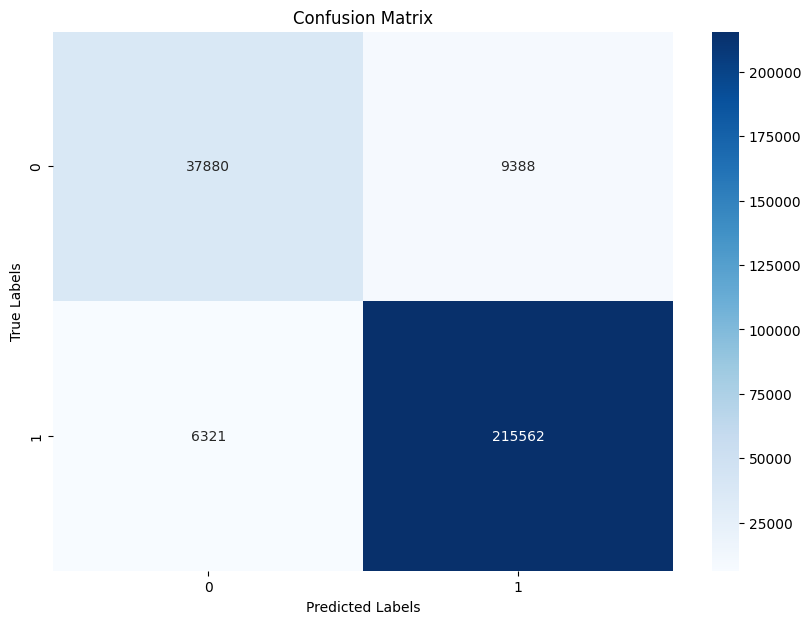

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Assuming 'MIS_Status' column is already label encoded and classes are [0, 1]
class_names = [0, 1]  # Replace with actual class names if different

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

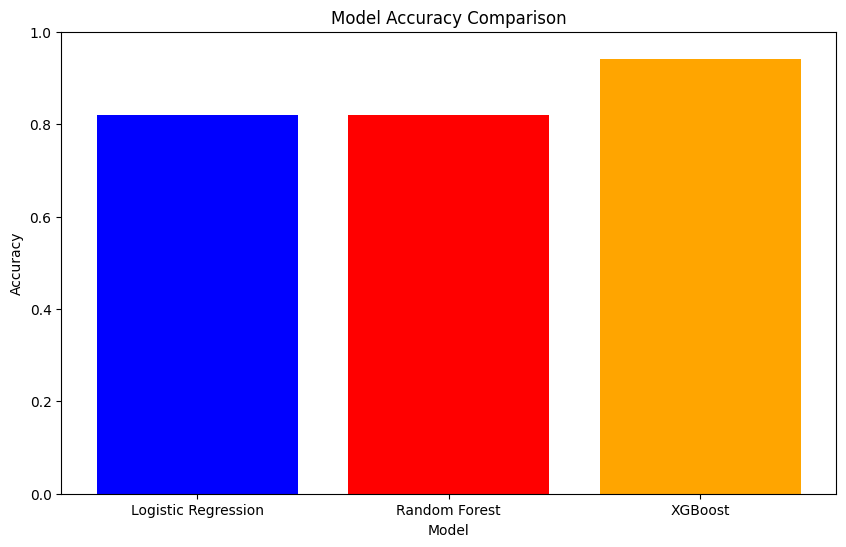

In [ ]:
import matplotlib.pyplot as plt

# Assume you have already computed these accuracy scores
accuracy_logistic_regression = 0.82  # Replace with actual value
accuracy_random_forest = 0.82        # Replace with actual value
accuracy_xgboost = 0.94              # Replace with actual value

# Create a dictionary with model names and their corresponding accuracies
accuracy_scores = {
    'Logistic Regression': accuracy_logistic_regression,
    'Random Forest': accuracy_random_forest,
    'XGBoost': accuracy_xgboost
}

# Plotting the accuracies
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'red', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()
